In [1]:
%pylab inline
import re
import pandas as pd
from collections import Counter
from collections import OrderedDict

import matplotlib
import seaborn as sns
#import pyupset as pyu
from riboraptor.helpers import path_leaf



matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style('white')
sns.set_context('paper', font_scale=2)

def strip_tx_version(txid):
    return re.sub(r"\.[0-9]+", "", txid)

def counts_to_tpm(counts, sizes):
    """Counts to TPM
    Parameters
    ----------
    counts: array like
            Series/array of counts
    sizes: array like
           Series/array of region sizes
    """
    rate = np.log(counts).subtract(np.log(sizes))
    denom = np.log(np.sum(np.exp(rate)))
    tpm = np.exp(rate - denom + np.log(1e6))
    return tpm

def featurecounts_to_tpm(fc_f, outfile):
    """Convert htseq-counts file to tpm
    Parameters
    ----------
    fc_f: string
             Path to htseq-count output
    outfile: string
             Path to output file with tpm values
    """
    feature_counts = pd.read_csv(fc_f, sep='\t', skiprows=[0])
    feature_counts.Geneid = [strip_tx_version(x) for x in feature_counts.Geneid]
    feature_counts = feature_counts.sort_values(by='Geneid').set_index('Geneid')
    feature_counts = feature_counts.drop(
        columns=["Chr", "Start", "End", "Strand"]
    )
    lengths = feature_counts["Length"]
    feature_counts = feature_counts.drop(columns=["Length"])
    tpm = feature_counts.apply(lambda x: counts_to_tpm(x, lengths), axis=0)
    tpm.columns = [col.replace('bams_unique/', '').replace('.bam', '') for col in tpm.columns]
    tpm.to_csv(outfile, sep="\t", index=True, header=True)

Populating the interactive namespace from numpy and matplotlib


In [11]:
featurecounts_to_tpm('/home/cmb-06/as/skchoudh/ribotricer-rna-bams/hg38/fcounts_CDS.tsv', '/home/cmb-06/as/skchoudh/ribotricer-rna-bams/hg38/fcounts_CDS.tpm.tsv')
featurecounts_to_tpm('/home/cmb-06/as/skchoudh/ribotricer-rna-bams/hg38/fcounts_exon.tsv', '/home/cmb-06/as/skchoudh/ribotricer-rna-bams/hg38/fcounts_exon.tpm.tsv')

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


In [13]:
featurecounts_to_tpm('/home/cmb-06/as/skchoudh/ribotricer-rna-bams/mm10/fcounts_CDS.tsv', '/home/cmb-06/as/skchoudh/ribotricer-rna-bams/mm10/fcounts_CDS.tpm.tsv')
featurecounts_to_tpm('/home/cmb-06/as/skchoudh/ribotricer-rna-bams/mm10/fcounts_exon.tsv', '/home/cmb-06/as/skchoudh/ribotricer-rna-bams/mm10/fcounts_exon.tpm.tsv')

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.6/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log


In [14]:
tpm_hg_cds = pd.read_csv('//home/cmb-06//as/skchoudh/ribotricer-rna-bams/hg38/fcounts_CDS.tpm.tsv', sep='\t')
for col in tpm_hg_cds.columns[1:]:
    #print(col, tpm_hg_cds[col][tpm_hg_cds[col]>1].shape)
    genelist =  sorted(tpm_hg_cds[tpm_hg_cds[col]>1].Geneid.tolist())
    with open('/staging/as/skchoudh/ribotricer-rna-bams/tpm-filtered-genes/hg38/{}_cds.txt'.format(col), 'w') as fh:
        for gene in genelist:
            fh.write('{}\n'.format(gene))
    


In [15]:
tpm_hg_exon = pd.read_csv('//home/cmb-06//as/skchoudh/ribotricer-rna-bams/hg38/fcounts_exon.tpm.tsv', sep='\t')
for col in tpm_hg_exon.columns[1:]:
    #print(col, tpm_hg_exon[col][tpm_hg_exon[col]>1].shape)
    genelist =  sorted(tpm_hg_exon[tpm_hg_exon[col]>1].Geneid.tolist())
    with open('//home/cmb-06//as/skchoudh/ribotricer-rna-bams/tpm-filtered-genes/hg38/{}_exon.txt'.format(col), 'w') as fh:
        for gene in genelist:
            fh.write('{}\n'.format(gene))
    


In [16]:
tpm_mm_cds = pd.read_csv('//home/cmb-06//as/skchoudh/ribotricer-rna-bams/mm10/fcounts_CDS.tpm.tsv', sep='\t')
for col in tpm_mm_cds.columns[1:]:
    #print(col, tpm_mm_cds[col][tpm_mm_cds[col]>1].shape)
    genelist =  sorted(tpm_mm_cds[tpm_mm_cds[col]>1].Geneid.tolist())
    with open('/staging/as/skchoudh/ribotricer-rna-bams/tpm-filtered-genes/mm10/{}_cds.txt'.format(col), 'w') as fh:
        for gene in genelist:
            fh.write('{}\n'.format(gene))
    
tpm_mm_exon = pd.read_csv('//home/cmb-06//as/skchoudh/ribotricer-rna-bams/mm10/fcounts_exon.tpm.tsv', sep='\t')
for col in tpm_mm_exon.columns[1:]:
    #print(col, tpm_mm_exon[col][tpm_mm_exon[col]>1].shape)
    genelist =  sorted(tpm_mm_exon[tpm_mm_exon[col]>1].Geneid.tolist())
    with open('//home/cmb-06//as/skchoudh/ribotricer-rna-bams/tpm-filtered-genes/mm10/{}_exon.txt'.format(col), 'w') as fh:
        for gene in genelist:
            fh.write('{}\n'.format(gene))
    


In [17]:
def read_cds_uorfs_startcodons(filelist):
    cds = OrderedDict()
    uorfs = OrderedDict()
    start_codons = OrderedDict()
    cds_df = pd.DataFrame()
    uorfs_df = pd.DataFrame()
    start_codons_df = pd.DataFrame()
    for fin in filelist:
        key = path_leaf(fin).replace('_translating_ORFs.tsv', '')
        df = pd.read_table(fin, header=0, sep='\t', usecols=['ORF_ID', 'ORF_type', 'status', 'length', 'transcript_id', 'gene_id', 'gene_name', 'start_codon'])
        a = df.loc[(df['ORF_type'] == 'annotated') & (df['status'] == 'translating'), 'gene_id'].tolist()        
        cds_df_key = pd.DataFrame(list(set(a)), columns=['gene_id']).set_index('gene_id')
        cds_df_key[key] = 1
        cds_df = cds_df.join(cds_df_key, how='outer')
        b = df.loc[(df['ORF_type'] == 'super_uORF') & (df['status'] == 'translating'), 'gene_id'].tolist()        
        uorfs_df_key = pd.DataFrame(list(set(b)), columns=['gene_id']).set_index('gene_id')
        uorfs_df_key[key] = 1
        uorfs_df = uorfs_df.join(uorfs_df_key, how='outer')
        
        s = df.loc[(df['ORF_type'] == 'super_uORF') & (df['status'] == 'translating'), 'start_codon'].tolist()
        start_codons_df_key = pd.DataFrame.from_dict(Counter(s), orient='index', columns=[key])
        start_codons_df = start_codons_df.join(start_codons_df_key, how='outer')
        
        start_codons[key] = s
    cds_df = cds_df.fillna(0)
    cds_df = cds_df.astype(int)
    
    uorfs_df = uorfs_df.fillna(0)
    uorfs_df = uorfs_df.astype(int)
    
    start_codons_df = start_codons_df.fillna(0)
    start_codons_df = start_codons_df.astype(int)
    
    cds_df = cds_df.sort_index().reset_index()
    cds_df['gene_id'] = cds_df['gene_id'].apply(strip_tx_version)
    
    uorfs_df = uorfs_df.sort_index().reset_index()
    uorfs_df['gene_id'] = uorfs_df['gene_id'].apply(strip_tx_version)
    
    start_codons_df = start_codons_df.sort_index().reset_index().rename(columns={'index': 'codon'})
    
    
    return cds_df, uorfs_df, start_codons_df

In [18]:
mouse_files  = ['/home/cmb-panasas2/wenzhenl/benchmark/uorfs/mouse/SRP003554_mouse/SRX026871_translating_ORFs.tsv',
           '/home/cmb-panasas2/wenzhenl/benchmark/uorfs/mouse/SRP062407_mouse/SRX1149649_translating_ORFs.tsv',
           '/home/cmb-panasas2/wenzhenl/benchmark/uorfs/mouse/SRP078005_mouse/SRX1900396_translating_ORFs.tsv',
           '/home/cmb-panasas2/wenzhenl/benchmark/uorfs/mouse/SRP091889_mouse/SRX2255510_translating_ORFs.tsv',
           '/home/cmb-panasas2/wenzhenl/benchmark/uorfs/mouse/SRP115915_mouse/SRX3110803_translating_ORFs.tsv']


human_files = ['/home/cmb-panasas2/wenzhenl/benchmark/uorfs/human/SRP010679_human/SRX118286_translating_ORFs.tsv',
               '/home/cmb-panasas2/wenzhenl/benchmark/uorfs/human/SRP063852_human/SRX1254413_translating_ORFs.tsv',
               '/home/cmb-panasas2/wenzhenl/benchmark/uorfs/human/SRP098789_human/SRX2536421_translating_ORFs.tsv',
               '/home/cmb-panasas2/wenzhenl/benchmark/uorfs/human/SRP102021_human/SRX2647167_translating_ORFs.tsv']


In [19]:
ribotricer_index_mm = pd.read_csv('/home/cmb-panasas2/skchoudh/genomes/mm10/ribotricer_vM11_longest_candidate_orfs.tsv', sep='\t')
ribotricer_index_mm.gene_id = [re.sub(r"\.[0-9]+", "", x) for x in ribotricer_index_mm.gene_id]

ribotricer_index_mm_subset = ribotricer_index_mm[['gene_id', 'ORF_type']].drop_duplicates().sort_values(by='gene_id')
ribotricer_index_mm_subset.gene_id = [re.sub(r"\.[0-9]+", "", x) for x in ribotricer_index_mm_subset.gene_id]
ribotricer_index_mm_subset_cds = set(ribotricer_index_mm[ribotricer_index_mm.ORF_type=='annotated'].gene_id.tolist())
ribotricer_index_mm_subset_uorf = set(ribotricer_index_mm[ribotricer_index_mm.ORF_type=='super_uORF'].gene_id.tolist())

In [20]:
ribotricer_index_hg = pd.read_csv('/home/cmb-panasas2/skchoudh/genomes/hg38/ribotricer_v25_longest_candidate_orfs.tsv', sep='\t')
ribotricer_index_hg.gene_id = [re.sub(r"\.[0-9]+", "", x) for x in ribotricer_index_hg.gene_id]
ribotricer_index_hg_subset = ribotricer_index_hg[['gene_id', 'ORF_type']].drop_duplicates().sort_values(by='gene_id')
ribotricer_index_hg_subset.gene_id = [re.sub(r"\.[0-9]+", "", x) for x in ribotricer_index_hg_subset.gene_id]
ribotricer_index_hg_subset_cds = set(ribotricer_index_hg[ribotricer_index_hg.ORF_type=='annotated'].gene_id.tolist())
ribotricer_index_hg_subset_uorf = set(ribotricer_index_hg[ribotricer_index_hg.ORF_type=='super_uORF'].gene_id.tolist())

In [21]:
cds_df_hg, uorfs_df_hg, start_codons_df_hg = read_cds_uorfs_startcodons(human_files)
cds_df_mm, uorfs_df_mm, start_codons_df_mm = read_cds_uorfs_startcodons(mouse_files)

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: read_table is deprecated, use read_csv instead.
  # Remove the CWD from sys.path while we load stuff.


In [22]:
cds_df_hg.columns

Index(['gene_id', 'SRX118286', 'SRX1254413', 'SRX2536421', 'SRX2647167'], dtype='object')

In [23]:
data = pd.read_excel('/home/cmb-panasas2/skchoudh/github_projects/ribocop-results/datasets_info.xlsx')
data.loc[data.SRA=='SRP063852', 'RNA sample'] = 'SRX426378'
data


,GEO,Treatment,SRA,RIBO sample,RIBO Reads,RNA sample,RNA reads,read lengths,offsets,RIBO adapter,RNA adapter,RIBO strandedness,RNA strandedness
0,GSE35469,cycloheximide (100 µg/mL),SRP010679,SRX118286,3272861.0,SRX118285,12295725.0,"28,29,30","12,13,13",CTGTAGGCAC,CTGTAGGCAC,forward,forward
1,SRA099816,cycloheximide,SRP029589,SRX345309,16394658.0,SRX345311,54889111.0,"29,30,32","12,12,13",CTGTAGGCACCATCAAT,CTGTAGGCACCATCAAT,forward,forward
2,GSE73136,cycloheximide,SRP063852,SRX1254413,NaN,SRX426378,NaN,"28,29,30","12,12,12",None,None,forward,forward
3,GSE94454,NaN,SRP098789,SRX2536421,NaN,SRX2536426,NaN,"28,30","12,13",CTGTAGGCACCATCAAT,CTGTAGGCACCATCAAT,forward,forward
4,GSE96716,NaN,SRP102021,SRX2647167,NaN,SRX2647164,NaN,"28,29,30,31","12,12,12,12",TCGTATGCCGTCTTCTGCTTG,None,forward,forward
5,GSE87328,NaN,SRP090415,SRX2189157,NaN,SRX2189154,NaN,"26,27,28,29,30","12,12,12,12,12",CTGTAGGCACCATCAAT,AGATCGGAAGAGCACAC,forward,reverse
6,GSE89183,NaN,SRP092068,SRX2268404,NaN,SRX2268396,NaN,"26,27,28,29,30","12,12,12,12,12",AGATCGGAAGAGCACACGTCT,None,forward,reverse
7,GSE96714,NaN,SRP102020,SRX2647162,NaN,SRX2647160,NaN,"29,30","12,12",TCGTATGCCGTCTTCTGCTTG,None,forward,no
8,GSE67902,NaN,SRP057253,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
filter_type = 'cds'
expressed_genes_hg = OrderedDict()
expressed_genes_hg_df = pd.DataFrame()
for sample in cds_df_hg.columns[1:]:
    srp = list(data[data['RIBO sample'] == sample]['SRA'])[0]
    #df = pd.read_csv('/staging/as/skchoudh/ribotricer-rna-bams/tpm-filtered-genes/hg38/{}_{}.txt'.format(srp, filter_type), names=['gene_id']).gene_id.tolist()
    df = pd.read_csv('/staging/as/skchoudh/ribotricer-rna-bams/tpm-filtered-genes/hg38/{}_{}.txt'.format(srp, filter_type), names=['gene_id'])
    df[sample] =1 
    df = df.set_index('gene_id')
    expressed_genes_hg_df = expressed_genes_hg_df.join(df, how='outer')
    
    
    expressed_genes_hg[sample] = set(df.index.tolist())
expressed_genes_hg_df = expressed_genes_hg_df.sort_index().fillna(0)

In [25]:
expressed_genes_hg_df.head()

,SRX118286,SRX1254413,SRX2536421,SRX2647167
gene_id,,,,
ENSG00000000003,1.0,1.0,1.0,1.0
ENSG00000000419,1.0,1.0,1.0,1.0
ENSG00000000457,1.0,1.0,1.0,1.0
ENSG00000000460,1.0,1.0,1.0,1.0
ENSG00000000971,1.0,0.0,1.0,0.0


In [26]:
filter_type = 'cds'
expressed_genes_mm = OrderedDict()
expressed_genes_mm_df = pd.DataFrame()
for sample in cds_df_mm.columns[1:]:
    if sample == 'SRX026871':
        srp = 'SRP003554'
    elif sample == 'SRX1149649':
        srp = 'SRP062407'
    elif sample == 'SRX1900396':
        srp = 'SRP078005'
    elif sample == 'SRX2255510':
        srp = 'SRP091889'
    elif sample == 'SRX3110803':
        srp = 'SRP115915'
    else:
        raise ValueError()
    #df = pd.read_csv('/staging/as/skchoudh/ribotricer-rna-bams/tpm-filtered-genes/mm10/{}_{}.txt'.format(srp, filter_type), names=['gene_id']).gene_id.tolist()
    df = pd.read_csv('/staging/as/skchoudh/ribotricer-rna-bams/tpm-filtered-genes/mm10/{}_{}.txt'.format(srp, filter_type), names=['gene_id'])
    df[sample] =1 
    df = df.set_index('gene_id')
    expressed_genes_mm_df = expressed_genes_mm_df.join(df, how='outer')
    expressed_genes_mm[sample] = set(df.index.tolist())
expressed_genes_mm_df = expressed_genes_mm_df.sort_index().fillna(0)

In [27]:
expressed_genes_mm_df.head()

,SRX026871,SRX1149649,SRX1900396,SRX2255510,SRX3110803
gene_id,,,,,
ENSMUSG00000000001,1.0,1.0,1.0,1.0,1.0
ENSMUSG00000000028,1.0,1.0,1.0,1.0,1.0
ENSMUSG00000000037,0.0,1.0,0.0,1.0,0.0
ENSMUSG00000000049,0.0,1.0,1.0,0.0,1.0
ENSMUSG00000000056,1.0,1.0,1.0,1.0,1.0


In [28]:
uorfs_df_hg[uorfs_df_hg[sample]>1]

KeyError: 'SRX3110803'

In [29]:
ratio_data_hg = []
for sample in cds_df_hg.columns[1:]:
    # subset genes tranlsaitng in this sample
    ribo_cds_translating = set(cds_df_hg[cds_df_hg[sample]!=0].gene_id.tolist())
    ribo_uorf_translating = set(uorfs_df_hg[uorfs_df_hg[sample]!=0].gene_id.tolist())
        
    # how many of these are translating?                             
    ribo_cds_expressed_in_rna = ribo_cds_translating.intersection(expressed_genes_hg[sample])
    ribo_uorf_expressed_in_rna = ribo_uorf_translating.intersection(expressed_genes_hg[sample])
    
    ribo_urf_cds_translating_overlap = ribo_cds_translating.intersection(ribo_uorf_translating)
    ribo_urf_cds_overlap_expressed = ribo_cds_expressed_in_rna.intersection(ribo_uorf_expressed_in_rna)
    #print(sample, len(ribo_uorf_expressed_in_rna)/len(ribo_cds_expressed_in_rna),  len(ribo_uorf_translating)/len(expressed_genes_hg[sample]) ,len(ribo_cds_translating), len(ribo_uorf_translating), len(ribo_cds_expressed_in_rna), len(ribo_uorf_expressed_in_rna))
    ratio_data_hg.append((sample, len(ribo_cds_translating), len(ribo_uorf_translating),
                          len(ribo_cds_expressed_in_rna), len(ribo_uorf_expressed_in_rna),
                          len(ribo_urf_cds_translating_overlap),
                          len(ribo_urf_cds_overlap_expressed),
                          len(expressed_genes_hg[sample]) ))
                    
ratio_data_hg_df = pd.DataFrame(ratio_data_hg, columns=['sample', 'ribo_cds_translating', 'ribo_uorf_translating', 
                                                        'ribo_cds_expressed_in_rna',
                                                        'ribo_uorf_cds_translating_overlap',
                                                        'ribo_uorf_cds_overlap_expressed',
                                                        'ribo_uorf_expressed_in_rna', 'expressed_genes_hg']) 
ratio_data_hg_df.head()


,sample,ribo_cds_translating,ribo_uorf_translating,ribo_cds_expressed_in_rna,ribo_uorf_cds_translating_overlap,ribo_uorf_cds_overlap_expressed,ribo_uorf_expressed_in_rna,expressed_genes_hg
0,SRX118286,9246,869,8937,850,764,752,11886
1,SRX1254413,12744,3320,11589,3236,3263,3193,12364
2,SRX2536421,10546,1100,9921,1081,1028,1016,11461
3,SRX2647167,9520,1600,8752,1538,1401,1359,11351


In [30]:
ratio_data_hg_df['ratio_ribo_uorf_translating_expressed'] = ratio_data_hg_df['ribo_uorf_cds_translating_overlap']/ratio_data_hg_df['ribo_cds_expressed_in_rna']
ratio_data_hg_df['ratio_ribo_uorf_translating'] = ratio_data_hg_df['ribo_uorf_translating']/ratio_data_hg_df['ribo_cds_translating']
ratio_data_hg_df_tidy = ratio_data_hg_df.melt(id_vars='sample')#.rename(columns=str.title)
ratio_data_hg_df_tidy_prop = ratio_data_hg_df_tidy[ratio_data_hg_df_tidy.variable.isin(['ratio_ribo_uorf_translating_expressed', 'ratio_ribo_uorf_translating'])]
ratio_data_hg_df_tidy_prop

,sample,variable,value
28,SRX118286,ratio_ribo_uorf_translating_expressed,0.095110
29,SRX1254413,ratio_ribo_uorf_translating_expressed,0.279230
30,SRX2536421,ratio_ribo_uorf_translating_expressed,0.108961
31,SRX2647167,ratio_ribo_uorf_translating_expressed,0.175731
32,SRX118286,ratio_ribo_uorf_translating,0.093987
33,SRX1254413,ratio_ribo_uorf_translating,0.260515
34,SRX2536421,ratio_ribo_uorf_translating,0.104305
35,SRX2647167,ratio_ribo_uorf_translating,0.168067


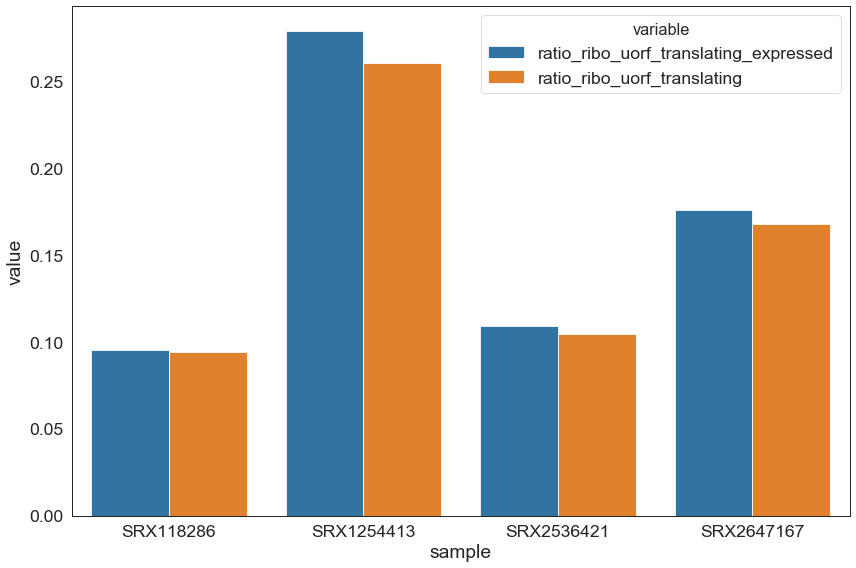

In [31]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='sample', y='value', hue='variable', data=ratio_data_hg_df_tidy_prop, ax=ax)
fig.tight_layout()
fig.savefig('ratio_uorf_hg_comparison.png')

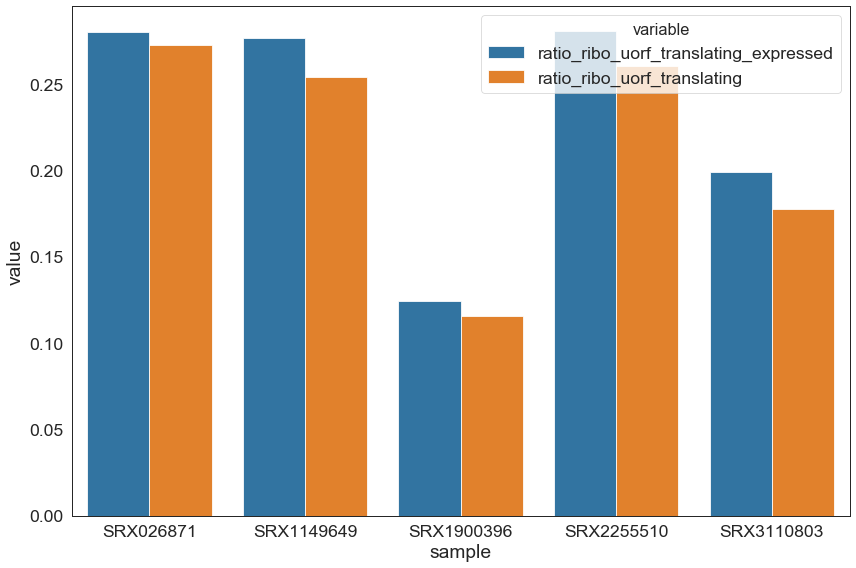

In [32]:
ratio_data_mm = []
for sample in cds_df_mm.columns[1:]:
    # subset genes tranlsaitng in this sample
    ribo_cds_translating = set(cds_df_mm[cds_df_mm[sample]!=0].gene_id.tolist())
    ribo_uorf_translating = set(uorfs_df_mm[uorfs_df_mm[sample]!=0].gene_id.tolist())
        
    # how many of these are translating?                             
    ribo_cds_expressed_in_rna = ribo_cds_translating.intersection(expressed_genes_mm[sample])
    ribo_uorf_expressed_in_rna = ribo_uorf_translating.intersection(expressed_genes_mm[sample])
    
    ribo_urf_cds_translating_overlap = ribo_cds_translating.intersection(ribo_uorf_translating)
    ribo_urf_cds_overlap_expressed = ribo_cds_expressed_in_rna.intersection(ribo_uorf_expressed_in_rna)
    #print(sample, len(ribo_uorf_expressed_in_rna)/len(ribo_cds_expressed_in_rna),  len(ribo_uorf_translating)/len(expressed_genes_mm[sample]) ,len(ribo_cds_translating), len(ribo_uorf_translating), len(ribo_cds_expressed_in_rna), len(ribo_uorf_expressed_in_rna))
    ratio_data_mm.append((sample, len(ribo_cds_translating), len(ribo_uorf_translating),
                          len(ribo_cds_expressed_in_rna), len(ribo_uorf_expressed_in_rna),
                          len(ribo_urf_cds_translating_overlap),
                          len(ribo_urf_cds_overlap_expressed),
                          len(expressed_genes_mm[sample]) ))
                    
ratio_data_mm_df = pd.DataFrame(ratio_data_mm, columns=['sample', 'ribo_cds_translating', 'ribo_uorf_translating', 
                                                        'ribo_cds_expressed_in_rna',
                                                        'ribo_uorf_cds_translating_overlap',
                                                        'ribo_uorf_cds_overlap_expressed',
                                                        'ribo_uorf_expressed_in_rna', 'expressed_genes_mm']) 
ratio_data_mm_df['ratio_ribo_uorf_translating_expressed'] = ratio_data_mm_df['ribo_uorf_cds_translating_overlap']/ratio_data_mm_df['ribo_cds_expressed_in_rna']
ratio_data_mm_df['ratio_ribo_uorf_translating'] = ratio_data_mm_df['ribo_uorf_translating']/ratio_data_mm_df['ribo_cds_translating']

ratio_data_mm_df_tidy = ratio_data_mm_df.melt(id_vars='sample')#.rename(columns=str.title)
ratio_data_mm_df_tidy_prop = ratio_data_mm_df_tidy[ratio_data_mm_df_tidy.variable.isin(['ratio_ribo_uorf_translating_expressed', 'ratio_ribo_uorf_translating'])]
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='sample', y='value', hue='variable', data=ratio_data_mm_df_tidy_prop, ax=ax)
fig.tight_layout()
fig.savefig('ratio_uorf_mm_comparison.png')

In [33]:
ratio_data_mm

[('SRX026871', 10369, 2825, 9906, 2776, 2755, 2724, 10678),
 ('SRX1149649', 14542, 3695, 13169, 3645, 3648, 3607, 13620),
 ('SRX1900396', 10564, 1221, 9584, 1192, 1165, 1148, 10558),
 ('SRX2255510', 12739, 3315, 11645, 3270, 3128, 3105, 12828),
 ('SRX3110803', 11264, 2002, 9723, 1936, 1854, 1810, 10714)]

# How many of these expressed genes have uORFs in the index?

In [34]:
for sample in cds_df_hg.columns[1:]:
    print(len(expressed_genes_hg[sample].intersection(ribotricer_index_hg_subset_uorf))/len(expressed_genes_hg[sample]))

0.7017499579337035
0.7013102555807182
0.6960998167699154
0.7054004052506387


In [35]:
for sample in cds_df_mm.columns[1:]:
    print(len(expressed_genes_mm[sample].intersection(ribotricer_index_mm_subset_uorf))/len(expressed_genes_mm[sample]))

0.6221202472373104
0.6460352422907489
0.621045652585717
0.6267539756782039
0.6230166137763674


In [36]:
uorfs_df_hg

,gene_id,SRX118286,SRX1254413,SRX2536421,SRX2647167
0,ENSG00000000457,0,0,0,1
1,ENSG00000001460,0,1,0,0
2,ENSG00000001461,1,1,0,1
3,ENSG00000001617,1,1,0,0
4,ENSG00000001629,0,1,0,0
5,ENSG00000001631,0,1,0,1
6,ENSG00000002587,0,0,0,1
7,ENSG00000002822,0,1,1,1
8,ENSG00000003056,0,1,1,1
9,ENSG00000003096,0,1,0,0


In [42]:
cds_genewise_sum_hg = pd.DataFrame(cds_df_hg.set_index('gene_id').sum(axis=1), columns=['cds'])
uorf_genewise_sum_hg = pd.DataFrame(uorfs_df_hg.set_index('gene_id').sum(axis=1), columns=['uorf'])
uorf_cds_genewise_hg = cds_genewise_sum_hg.join(uorf_genewise_sum_hg, how='outer').fillna(0)
uorf_cds_genewise_hg['ratio'] = uorf_cds_genewise_hg['uorf']/uorf_cds_genewise_hg['cds']
uorf_cds_genewise_hg.head()

,cds,uorf,ratio
gene_id,,,
ENSG00000000003,4.0,0.0,0.00
ENSG00000000419,4.0,0.0,0.00
ENSG00000000457,4.0,1.0,0.25
ENSG00000000460,4.0,0.0,0.00
ENSG00000000971,3.0,0.0,0.00


In [44]:
np.nanmean(uorf_cds_genewise_hg['ratio'])

inf

In [39]:
sum(np.isinf(uorf_cds_genewise_hg))

cds       0
uorf      0
ratio    59
dtype: int64

In [40]:
uorf_genewise_sum_mm.uorf.min()

NameError: name 'uorf_genewise_sum_mm' is not defined

In [41]:
np.std(uorf_cds_genewise_hg['ratio'])

nan

In [45]:
cds_genewise_sum_mm = pd.DataFrame(cds_df_mm.set_index('gene_id').sum(axis=1), columns=['cds'])
uorf_genewise_sum_mm = pd.DataFrame(uorfs_df_mm.set_index('gene_id').sum(axis=1), columns=['uorf'])

uorf_cds_genewise_mm = cds_genewise_sum_mm.join(uorf_genewise_sum_mm, how='outer').fillna(0)

uorf_cds_genewise_mm['ratio'] = uorf_cds_genewise_mm['uorf']/uorf_cds_genewise_mm['cds']

uorf_cds_genewise_mm = uorf_cds_genewise_mm[~np.isinf(uorf_cds_genewise_mm.ratio)]

np.mean(uorf_cds_genewise_mm['ratio'])

0.21397697186133857

In [46]:
uorf_cds_genewise_mm['ratio'] = uorf_cds_genewise_mm['uorf']/uorf_cds_genewise_mm['cds']
np.median(uorf_cds_genewise_mm['ratio'])
#len(uorf_cds_genewise_mm[np.isinf(uorf_cds_genewise_mm.ratio)])

0.0

In [47]:
np.std(uorf_cds_genewise_mm[uorf_cds_genewise_mm['ratio']<1]['ratio'])


0.237729888328084

In [48]:
uorf_cds_genewise_hg.shape

(13907, 3)

In [49]:
uorf_cds_genewise_hg = uorf_cds_genewise_hg[~np.isinf(uorf_cds_genewise_hg.ratio)]

(array([1.1535e+04, 1.6310e+03, 5.6900e+02, 6.3000e+01, 0.0000e+00,
        3.9000e+01, 0.0000e+00, 7.0000e+00, 0.0000e+00, 4.0000e+00]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

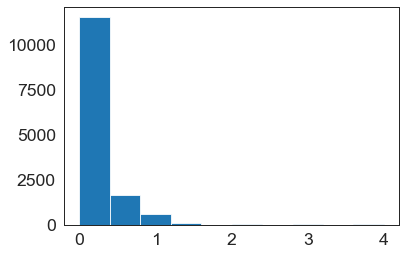

In [50]:
plt.hist(uorf_cds_genewise_hg['ratio'])

In [51]:
np.nanmean(uorf_cds_genewise_hg['ratio'])

0.15897000770267666

In [52]:
uorf_cds_genewise_ratio_hg = uorfs_df_hg.set_index('gene_id').sum(axis=1)/cds_df_hg.set_index('gene_id').sum(axis=1).fillna(0)
uorf_cds_genewise_ratio_mm = uorfs_df_mm.set_index('gene_id').sum(axis=1)/cds_df_mm.set_index('gene_id').sum(axis=1).fillna(0)


In [53]:
uorf_cds_genewise_ratio_hg.min()

0.25

/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/cmb-06/as/skchoudh/software_frozen/anaconda37/envs/riboraptor/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2817.,  593.,  606.,   26.,   39.,    0.,    0.,    7.,    0.,
           4.]),
 array([0.25 , 0.625, 1.   , 1.375, 1.75 , 2.125, 2.5  , 2.875, 3.25 ,
        3.625, 4.   ]),
 <a list of 10 Patch objects>)

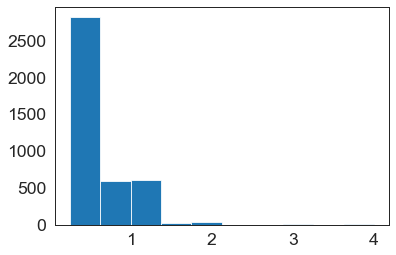

In [54]:
plt.hist(uorf_cds_genewise_ratio_hg)

In [55]:
uorf_cds_genewise_ratio_hg.mean()

0.5379806125773868

In [56]:
uorf_cds_genewise_ratio_mm.mean()

0.569985238641955

In [57]:
len(uorf_cds_genewise_ratio_hg[uorf_cds_genewise_ratio_hg!=uorf_cds_genewise_ratio_hg])


9815

In [58]:
len(uorf_cds_genewise_ratio_hg)

13907

In [59]:
uorf_cds_genewise_ratio_hg = uorf_cds_genewise_ratio_hg[uorf_cds_genewise_ratio_hg==uorf_cds_genewise_ratio_hg]
uorf_cds_genewise_ratio_mm = uorf_cds_genewise_ratio_mm[uorf_cds_genewise_ratio_mm==uorf_cds_genewise_ratio_mm]

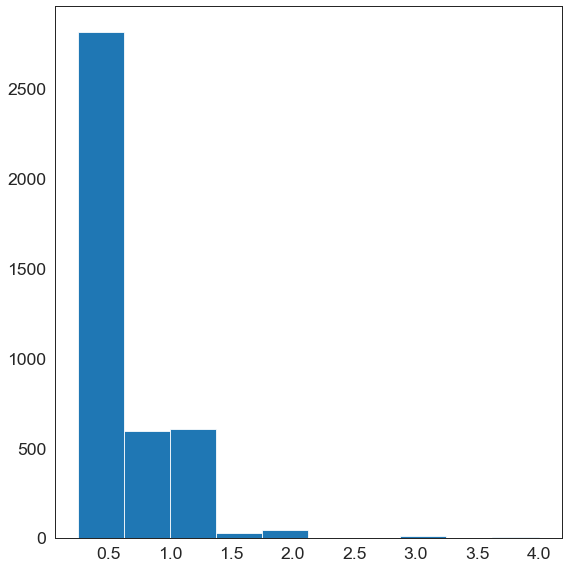

In [62]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(uorf_cds_genewise_ratio_hg)
fig.tight_layout()
fig.savefig('uorf_cds_genewise_ratio_hg.png')

In [223]:
uorf_cds_genewise_ratio_mm.mean()

0.569985238641955

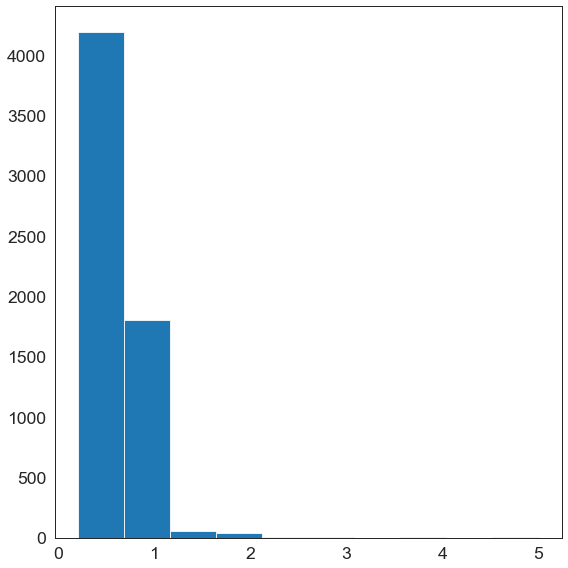

In [63]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist(uorf_cds_genewise_ratio_mm)
fig.tight_layout()
fig.savefig('uorf_cds_genewise_ratio_mm.png')

In [64]:
uorf_cds_genewise_ratio_mm.mean()


0.569985238641955